In [1]:
# Numpy Library for Numerical Calculations
import numpy as np

# Pandas Library for Dataframe
import pandas as pd

# Matplotlib, Seaborn and plotly for Plottings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Calendar Library for knowing about the Year-Month-Day
import calendar

# Datetime library for handling date and time in the Dataset
import datetime as dt

In [2]:
unemployed = pd.read_csv("/content/sample_data/Unemployment in India.csv")

In [3]:
unemployed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
unemployed.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
unemployed.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [6]:
unemployed.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
unemployed.shape

(768, 7)

In [8]:
unemployed.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
unemployed.columns =

In [12]:
unemployed['Date'] = pd.to_datetime(unemployed['Date'], dayfirst=True)
unemployed['Frequency']= unemployed['Frequency'].astype('category')
unemployed['Month'] =  unemployed['Date'].dt.month

# Fill NaN values in 'Month' column with 0
unemployed['Month'] = unemployed['Month'].fillna(0)

# Convert 'Month' column to integer
unemployed['Month_Num'] = unemployed['Month'].astype(int)

unemployed['Month_Name'] =  unemployed['Month_Num'].apply(lambda x: calendar.month_abbr[x])
unemployed['Region'] = unemployed['Region'].astype('category')

In [14]:
unemployed.drop(columns='Month',inplace=True)
unemployed.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month_Num,Month_Name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [15]:
unemployed_stats = unemployed[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
round(unemployed_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [16]:
region_stats = unemployed.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()
region_stats = round(region_stats,2)

region_stats

<ipython-input-16-3439fa234c64>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_stats = unemployed.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()


,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,Rural,10.32,10192852.57,44.46
1,Urban,13.17,4388625.58,40.90


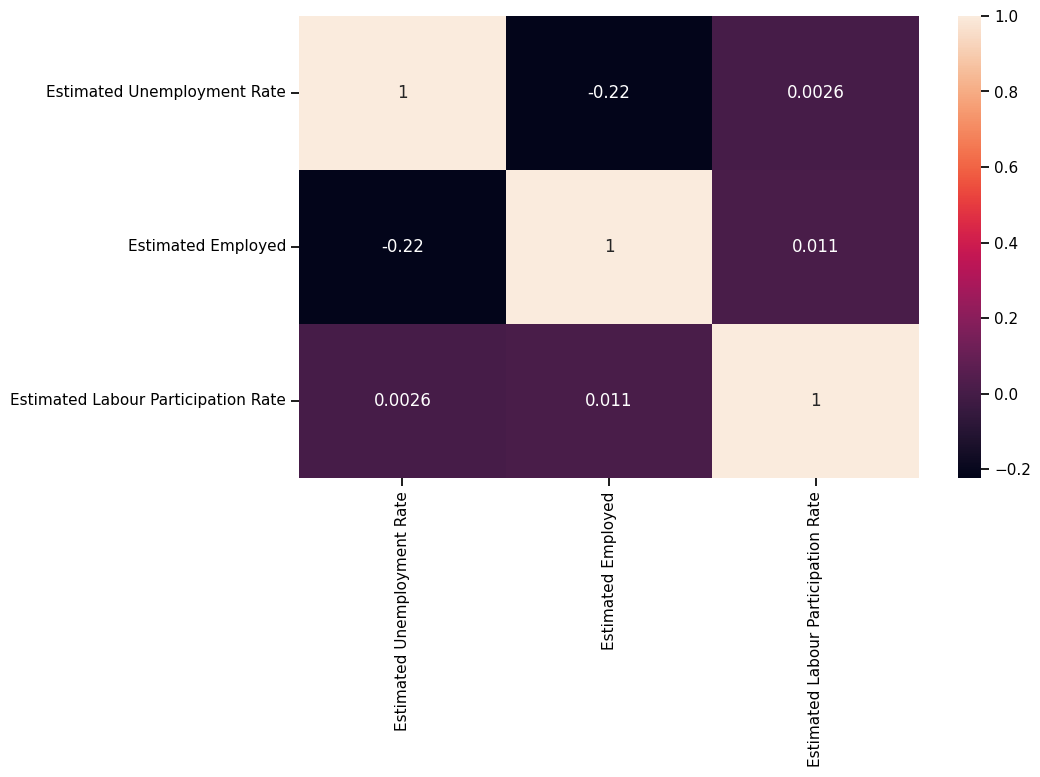

In [21]:
# Select only numerical features for correlation
numerical_features = ['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']
heat_maps = unemployed[numerical_features].corr()

# Plotting the Figure
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.set_palette('rocket')
sns.heatmap(heat_maps, annot=True,);

In [22]:
fig = px.box(unemployed, x = 'States', y = 'Estimated Unemployment Rate', color = 'States', title='Unemployment Rate', template='plotly')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

In [23]:
fig = px.scatter_matrix(unemployed, template = 'plotly', dimensions = ['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'], color = 'Region')
fig.show()

In [24]:
plot_ump = unemployed[['Estimated Unemployment Rate','States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x = 'States', y = 'Estimated Unemployment Rate', color = 'States', title = 'Average Unemployment Rate in each State', template = 'plotly')
fig.show()

In [25]:
fig = px.bar(unemployed, x = 'Region', y = 'Estimated Unemployment Rate', animation_frame = 'Month_Name', color = 'States', title='Unemployment Rate across region from Jan 2020 to Oct 2020', height = 700, template = 'plotly')
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.show()

In [31]:
# Example with a few states:
coordinates = pd.DataFrame({'States': ['Andhra Pradesh', 'Assam', 'Bihar'],
                                 'longitude': [80.2093, 92.5128, 85.5195],
                                 'latitude': [15.9129, 26.5523, 25.6055]})

In [32]:
unemployed = pd.merge(unemployed, coordinates, on='States', how='left')

In [33]:
fig = px.scatter_geo(unemployed, lon='longitude', lat='latitude',
                         color="Region", hover_name="States",
                         size="Estimated Unemployment Rate",
                         animation_frame="Month_Name", scope='asia',
                         template='plotly',
                         title='Impact of Lockdown on Employement across Regions')

In [34]:
lock = unemployed[(unemployed['Month_Num'] >= 4) & (unemployed['Month_Num'] <=7)]
bf_lock = unemployed[(unemployed['Month_Num'] >= 1) & (unemployed['Month_Num'] <=4)]
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_lock['Unemployment Rate before Lockdown'] = g_bf_lock['Estimated Unemployment Rate']
g_lock.columns = ['States',  'Unemployment Rate after Lockdown', 'Unemployment Rate before Lockdown']
g_lock.head()

,States,Unemployment Rate after Lockdown,Unemployment Rate before Lockdown
0,Andhra Pradesh,10.054167,10.756250
1,Assam,6.049091,6.750000
2,Bihar,25.370000,23.690000
3,Chandigarh,14.942500,19.366667
4,Chhattisgarh,11.659167,9.028750


In [35]:
g_lock['Percentage change in Unemployment'] = round(g_lock['Unemployment Rate after Lockdown'] - g_lock['Unemployment Rate before Lockdown'] / g_lock['Unemployment Rate before Lockdown'], 2)
plot_per = g_lock.sort_values('Percentage change in Unemployment')
fig = px.bar(plot_per, x = 'States', y = 'Percentage change in Unemployment', color = 'Percentage change in Unemployment', title = 'Percentage change in Unemployment in each State after Lockdown', template = 'ggplot2')
fig.show()